 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns, setting date as index and correcting the index format
csv_path_whale = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(csv_path_whale, index_col="Date", parse_dates=True)
pd.to_datetime(whale_df.index)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path_algo = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path_algo, index_col="Date", parse_dates=True)
pd.to_datetime(algo_df.index)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csv_path_sp500 = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(csv_path_sp500, index_col="Date", parse_dates=True)
sp500_df

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_33546/273750532.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(csv_path_sp500, index_col="Date", parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)
sp500_df


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [11]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = daily_returns_sp500.rename(columns={'Close':'S&P 500'})
daily_returns_sp500

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_df, algo_df, daily_returns_sp500], axis='columns', join='inner')
daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of Portfolios vs. S&P 500'}, xlabel='Date', ylabel='Daily Return'>

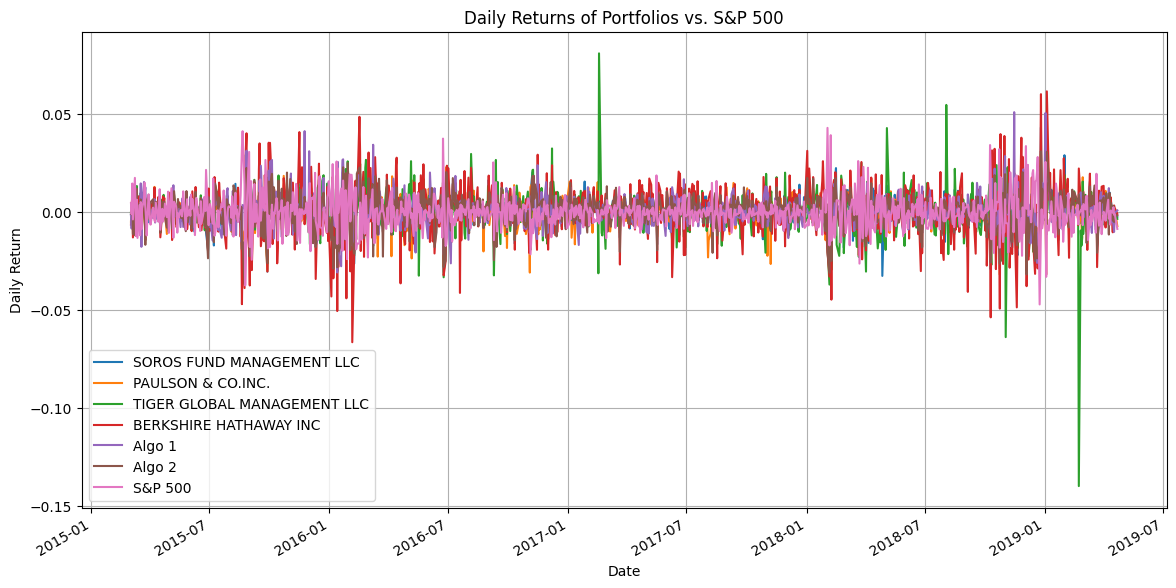

In [15]:
# Plot daily returns of all portfolios
daily_returns.plot(title="Daily Returns of Portfolios vs. S&P 500", xlabel="Date", ylabel='Daily Return', grid=True, figsize=(14,7))


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date', ylabel='Cumulative Return'>

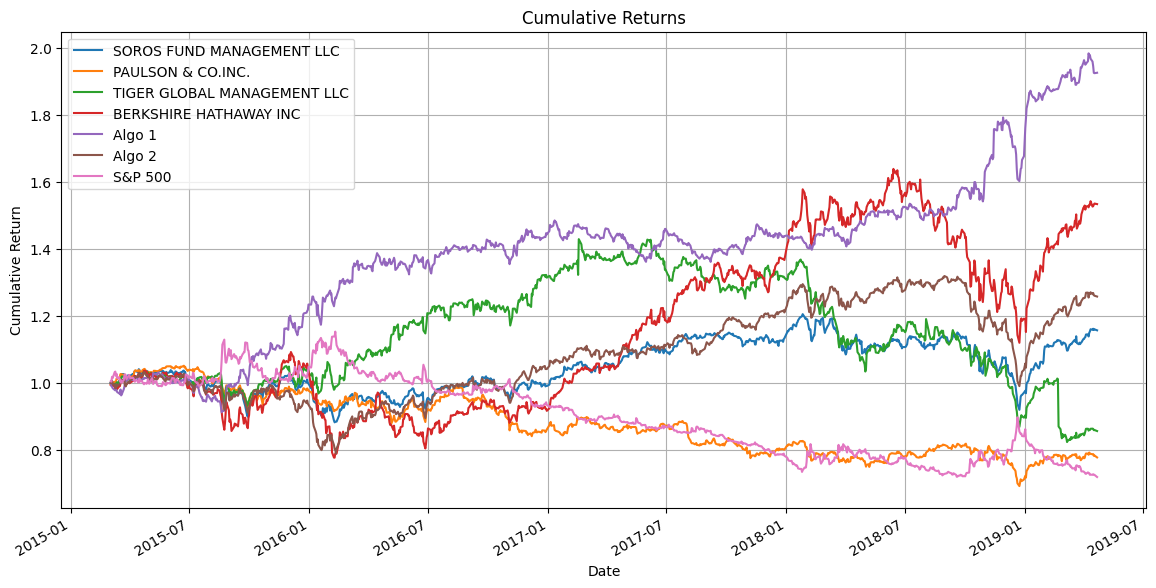

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns", xlabel="Date", ylabel='Cumulative Return', grid=True, figsize=(14,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'S&P 500'}, xlabel='Date', ylabel='Daily Return'>

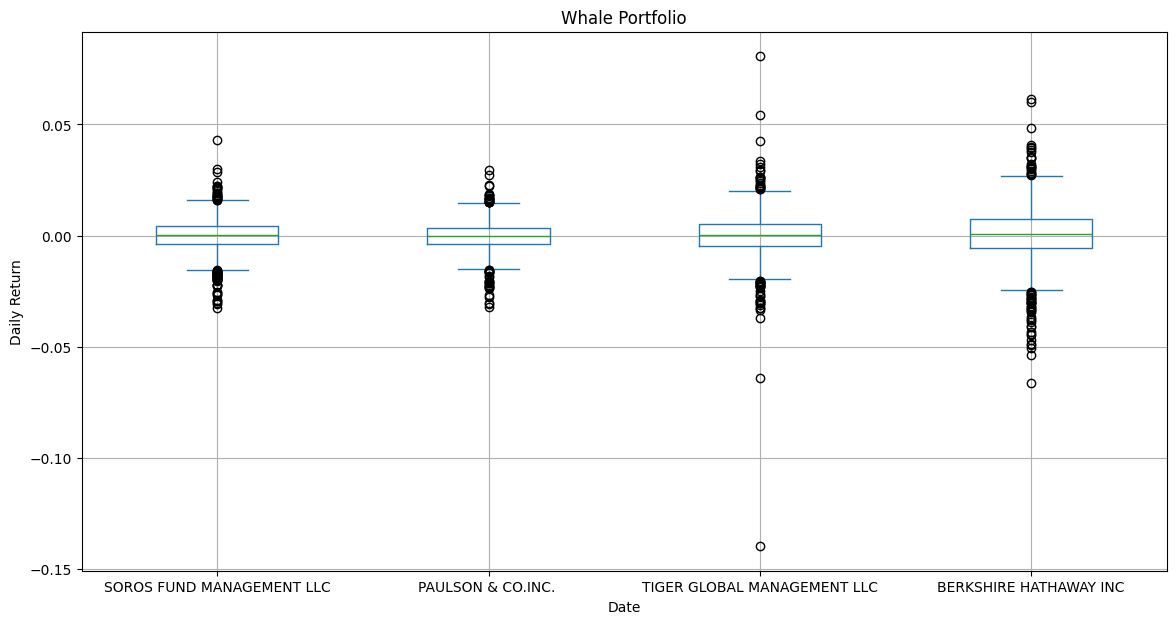

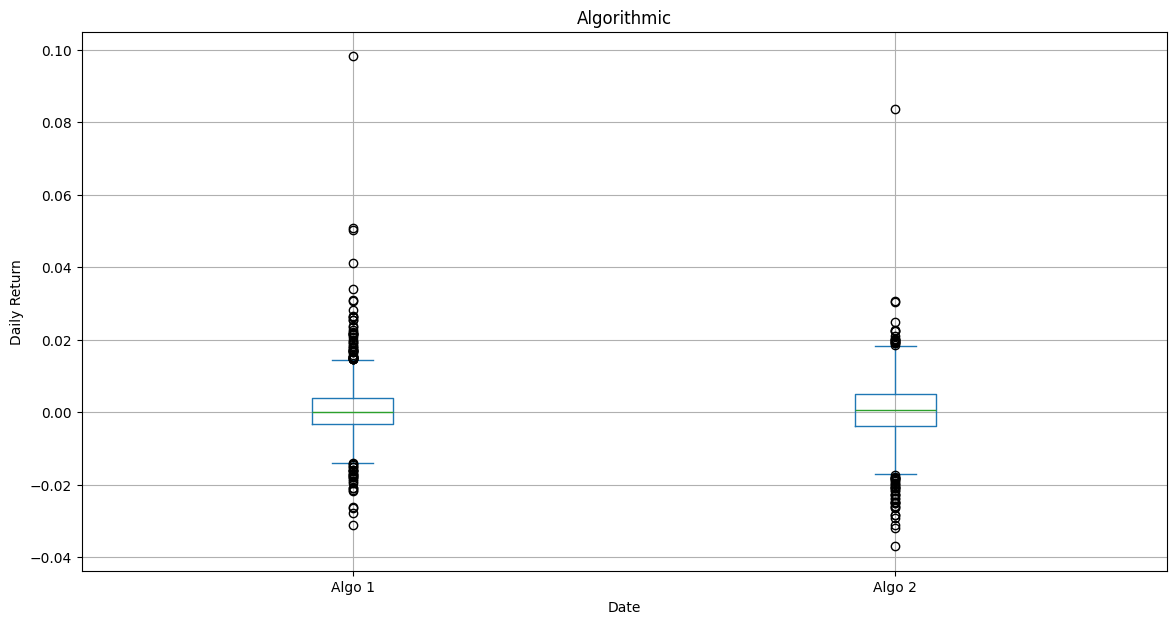

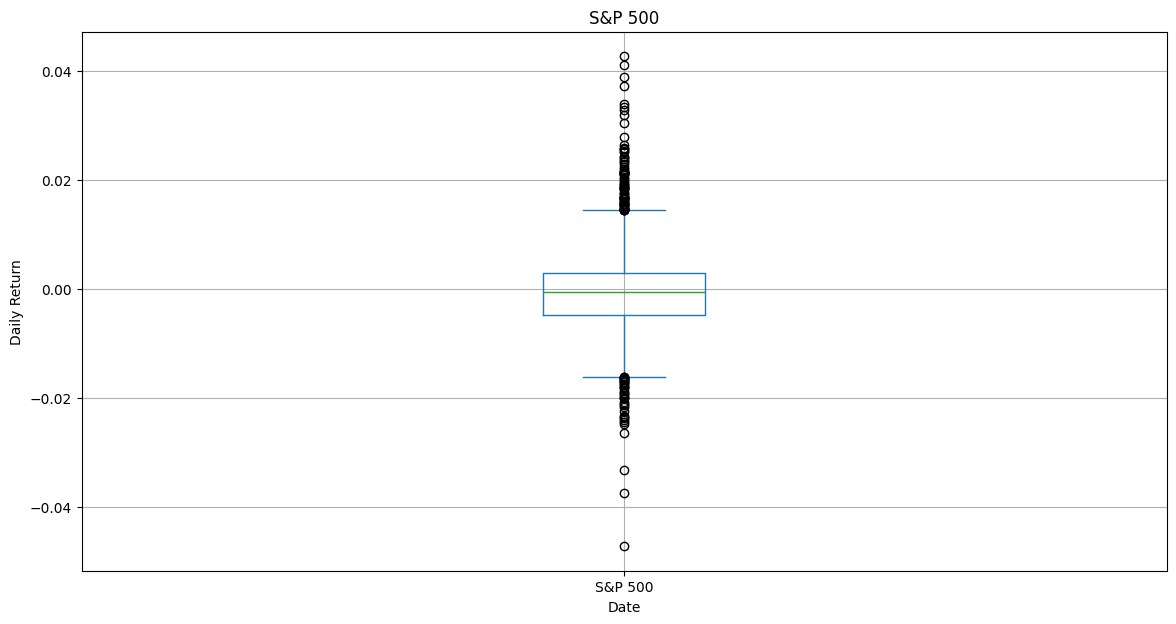

In [17]:
# Box plot to visually show risk
whale_df.plot.box(title="Whale Portfolio", xlabel="Date", ylabel='Daily Return', grid=True, figsize=(14,7))
algo_df.plot.box(title='Algorithmic', xlabel='Date', ylabel='Daily Return', grid=True, figsize=(14,7))
daily_returns_sp500.plot.box(title='S&P 500', xlabel='Date', ylabel='Daily Return', grid=True, figsize=(14,7) )


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_returns_std = daily_returns['S&P 500'].std()
sp500_returns_std
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_returns_std]
print(f'Portfolios riskier than the S&P 500:', riskier_portfolios)

Portfolios riskier than the S&P 500: TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of Portfolios vs. S&P 500 (21-Day Window)'}, xlabel='Date', ylabel='Rolling Standard Deviation'>

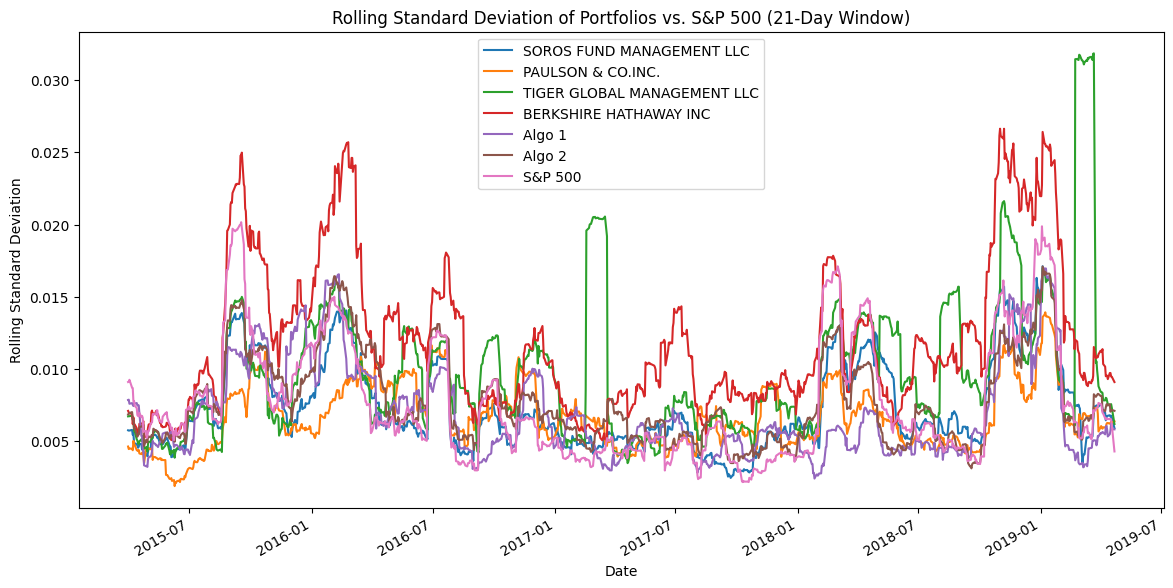

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(14,7), xlabel='Date', ylabel='Rolling Standard Deviation', title='Rolling Standard Deviation of Portfolios vs. S&P 500 (21-Day Window)')

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation_matrix = daily_returns.corr()
# Display the correlation matrix
correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta Trend For SOROS and the S&P 500 (60-Day Window)'}, xlabel='Date'>

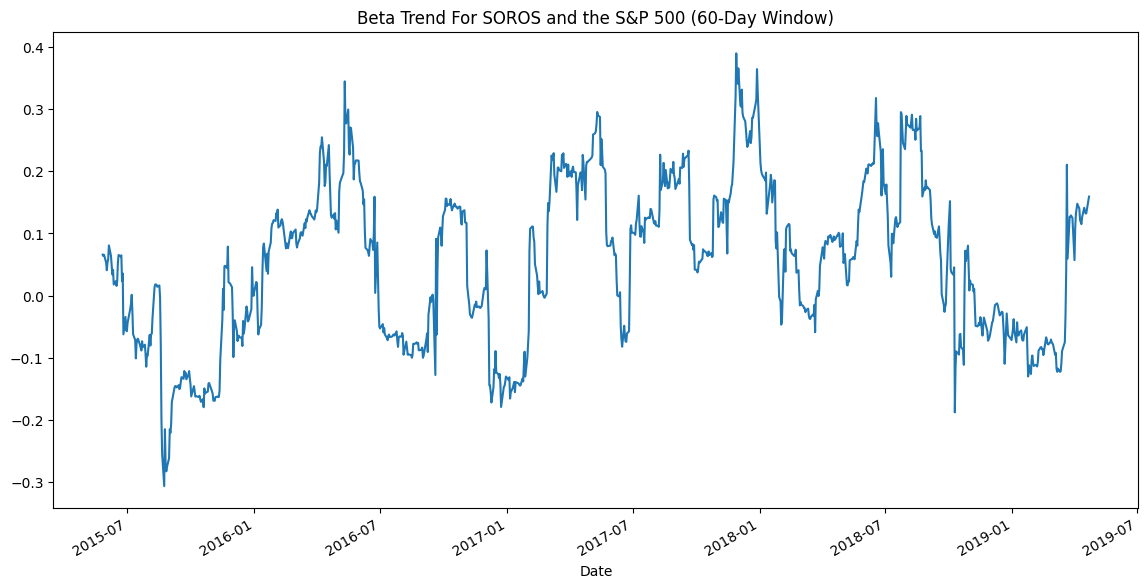

In [23]:
#Not quite sure if this part was needed or it was only asking for 60-Day 
# Calculate covariance of a single portfolio
covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['S&P 500'])
# Calculate variance of S&P 500
variance = daily_returns['S&P 500'].var()
# Computing beta
beta = covariance / variance
beta

#Calculate 60-Day Rolling Covariance of SOROS vs S&P 500
rolling_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
#Calculate 60-Day Rolling Variance of S&P 500 Returns
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()
#Calculate 60-Day Rolling Beta of SOROS
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(14,7), title='Beta Trend For SOROS and the S&P 500 (60-Day Window)',)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
half_life = 21
ewm_std = daily_returns.ewm(halflife=half_life).std()
ewm_std



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

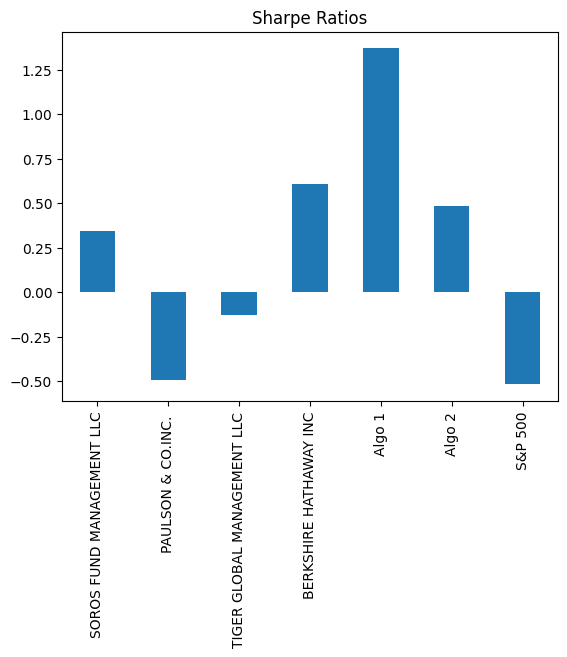

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

A higher Sharpe Ratio indicates a better risk-adjusted return. It suggests that the investment is delivering higher returns for the level of risk taken.
In this case we could say that Algo 1 and Algo 2 is outperforming both the S&P and Whale Portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_data = Path('Resources/AAPL.csv')
aapl_df = pd.read_csv(aapl_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_df

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_33546/1075547596.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-03,"32,34"
2015-03-04,"32,14"
2015-03-05,"31,6"
2015-03-06,"31,65"
2015-03-09,"31,79"
...,...
2019-04-12,"49,72"
2019-04-15,"49,81"
2019-04-16,"49,81"


In [28]:
# Reading data from 2nd stock
amzn_data = Path('Resources/AMZN.csv')
amzn_df = pd.read_csv(amzn_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
amzn_df

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_33546/2286980882.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  amzn_df = pd.read_csv(amzn_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-03,"19,23"
2015-03-04,"19,14"
2015-03-05,"19,39"
2015-03-06,19
2015-03-09,"18,93"
...,...
2019-04-12,"92,15"
2019-04-15,"92,24"
2019-04-16,"93,15"


In [29]:
# Reading data from 3rd stock
msft_data = Path('Resources/MSFT.csv')
msft_df = pd.read_csv(msft_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
msft_df

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_33546/2701217146.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  msft_df = pd.read_csv(msft_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-03,"43,28"
2015-03-04,"43,06"
2015-03-05,"43,11"
2015-03-06,"42,36"
2015-03-09,"42,85"
...,...
2019-04-12,"120,95"
2019-04-15,"121,05"
2019-04-16,"120,77"


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, amzn_df, msft_df], axis='columns', join='inner')
combined_df

,Close,Close,Close
Date,,,
2015-03-03,"32,34","19,23","43,28"
2015-03-04,"32,14","19,14","43,06"
2015-03-05,"31,6","19,39","43,11"
2015-03-06,"31,65",19,"42,36"
2015-03-09,"31,79","18,93","42,85"
...,...,...,...
2019-04-12,"49,72","92,15","120,95"
2019-04-15,"49,81","92,24","121,05"
2019-04-16,"49,81","93,15","120,77"


In [31]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.index = pd.to_datetime(combined_df.index, format='%d.%m.%Y %H:%M:%S')
combined_df.columns = ['AAPL', 'AMZN', 'MSFT']
combined_df['AAPL'] = pd.to_numeric(combined_df['AAPL'].str.replace(',', '.'), errors='coerce')
combined_df['AMZN'] = pd.to_numeric(combined_df['AMZN'].str.replace(',', '.'), errors='coerce')
combined_df['MSFT'] = pd.to_numeric(combined_df['MSFT'].str.replace(',', '.'), errors='coerce')
combined_df

,AAPL,AMZN,MSFT
Date,,,
2015-03-03,32.34,19.23,43.28
2015-03-04,32.14,19.14,43.06
2015-03-05,31.60,19.39,43.11
2015-03-06,31.65,19.00,42.36
2015-03-09,31.79,18.93,42.85
...,...,...,...
2019-04-12,49.72,92.15,120.95
2019-04-15,49.81,92.24,121.05
2019-04-16,49.81,93.15,120.77


In [32]:
# Calculate daily returns
daily_returns_combined = combined_df.pct_change()
# Drop NAs
daily_returns_combined.dropna(inplace=True)
# Display sample data
daily_returns_combined


,AAPL,AMZN,MSFT
Date,,,
2015-03-04,-0.006184,-0.004680,-0.005083
2015-03-05,-0.016801,0.013062,0.001161
2015-03-06,0.001582,-0.020113,-0.017397
2015-03-09,0.004423,-0.003684,0.011568
2015-03-10,-0.020761,-0.023772,-0.019137
...,...,...,...
2019-04-12,-0.000402,-0.000542,0.005152
2019-04-15,0.001810,0.000977,0.000827
2019-04-16,0.000000,0.009866,-0.002313


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns_combined.dot(weights)

# Display sample data
my_port_returns = pd.DataFrame({'Date': daily_returns_combined.index, 'MY PORTFOLIO': weighted_returns})
my_port_returns.set_index('Date', inplace=True)
my_port_returns.index = pd.to_datetime(my_port_returns.index)
#my_port_returns.index = my_port_returns.index.date
my_port_returns



,MY PORTFOLIO
Date,
2015-03-04,-0.005316
2015-03-05,-0.000860
2015-03-06,-0.011976
2015-03-09,0.004102
2015-03-10,-0.021223
...,...
2019-04-12,0.001403
2019-04-15,0.001205
2019-04-16,0.002517


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_returns = pd.concat([daily_returns, my_port_returns], axis='columns', join='inner')
all_combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,MY PORTFOLIO
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.005316
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.000860
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.011976
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.004102
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.021223
...,...,...,...,...,...,...,...,...
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630,0.001403
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.001205
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.002517


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_combined_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
MY PORTFOLIO                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
daily_std_all = all_combined_returns.std()
annual_std_all = daily_std_all * np.sqrt(252)
annual_std_all

SOROS FUND MANAGEMENT LLC      0.125459
PAULSON & CO.INC.              0.111554
TIGER GLOBAL MANAGEMENT LLC    0.173147
BERKSHIRE HATHAWAY INC         0.205245
Algo 1                         0.121116
Algo 2                         0.132535
S&P 500                        0.136360
MY PORTFOLIO                   0.222082
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Date', ylabel='Rolling Standard Deviation'>

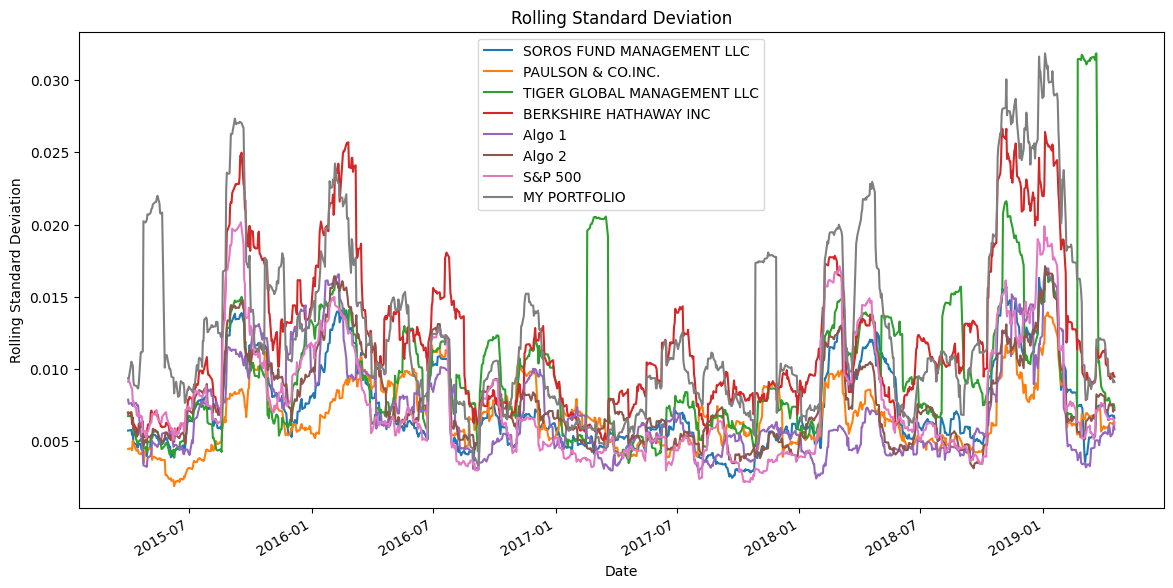

In [37]:
# Calculate rolling standard deviation
all_rolling_std = all_combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_rolling_std.plot(figsize=(14,7), xlabel='Date', ylabel='Rolling Standard Deviation', title='Rolling Standard Deviation')


### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation
all_correlation_matrix = all_combined_returns.corr()
# Display the correlation matrix
all_correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.699916,0.560995,0.754190,0.320884,0.826713,0.000338,0.657552
PAULSON & CO.INC.,0.699916,1.000000,0.434299,0.545448,0.268618,0.678249,0.012960,0.497788
TIGER GLOBAL MANAGEMENT LLC,0.560995,0.434299,1.000000,0.424152,0.164120,0.507121,-0.001796,0.461345
BERKSHIRE HATHAWAY INC,0.754190,0.545448,0.424152,1.000000,0.291560,0.687782,-0.013697,0.715242
Algo 1,0.320884,0.268618,0.164120,0.291560,1.000000,0.287833,-0.033804,0.246149
Algo 2,0.826713,0.678249,0.507121,0.687782,0.287833,1.000000,-0.002367,0.635653
S&P 500,0.000338,0.012960,-0.001796,-0.013697,-0.033804,-0.002367,1.000000,0.024875
MY PORTFOLIO,0.657552,0.497788,0.461345,0.715242,0.246149,0.635653,0.024875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta Trend For MY PORTFOLIO and the S&P 500 (60-Day Window)'}, xlabel='Date'>

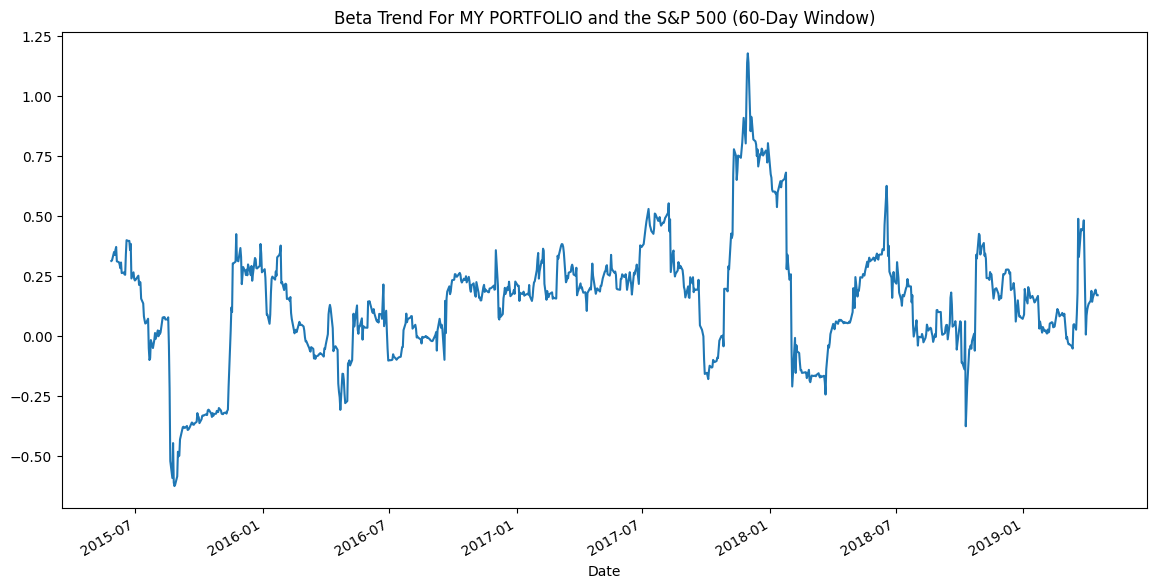

In [39]:
# Calculate and plot Beta

#Calculate 60-Day Rolling Covariance of My Portfolio vs S&P 500
my_rolling_covariance = all_combined_returns['MY PORTFOLIO'].rolling(window=60).cov(all_combined_returns['S&P 500'])
#Calculate 60-Day Rolling Variance of S&P 500 Returns
new_rolling_variance = all_combined_returns['S&P 500'].rolling(window=60).var()
#Calculate 60-Day Rolling Beta of My Portfolio
my_rolling_beta = my_rolling_covariance / new_rolling_variance
# Plot beta trend
my_rolling_beta.plot(figsize=(14,7), title='Beta Trend For MY PORTFOLIO and the S&P 500 (60-Day Window)',)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (all_combined_returns.mean() * 252) / (all_combined_returns.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.350687
PAULSON & CO.INC.             -0.465501
TIGER GLOBAL MANAGEMENT LLC   -0.124530
BERKSHIRE HATHAWAY INC         0.616456
Algo 1                         1.373513
Algo 2                         0.490095
S&P 500                       -0.511658
MY PORTFOLIO                   1.274394
dtype: float64

<Axes: title={'center': 'New Sharpe Ratios'}>

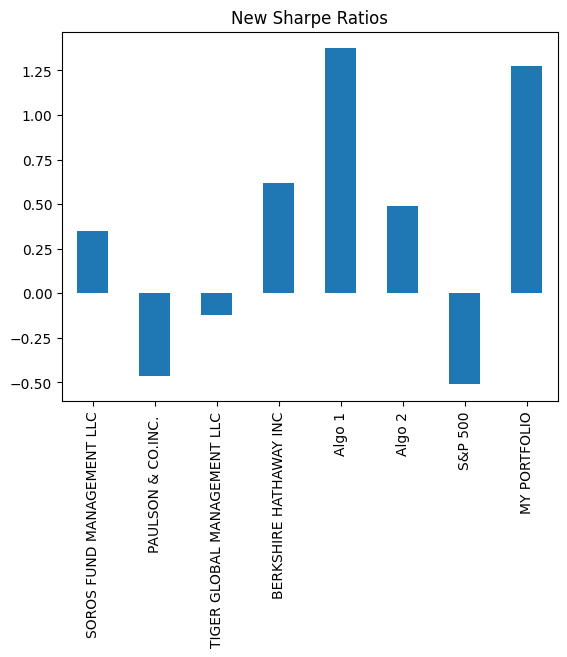

In [41]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind='bar', title='New Sharpe Ratios')

### How does your portfolio do?

I think my portfolio looks pretty bad. Annual standard deviation is the biggest which means it's risky. Sharpe ratio is the 2nd highest which means it would bring more return for a taken risk but it doesn't look safe with that annual std.